In [ ]:
name1 = "Daniela Gonzalez Favero" 
name2 = "Miguel Pereira Ostrowski"

honorPledge = "I affirm that I have not given or received any unauthorized " \
              "help on this assignment, and that this work is my own.\n"


print("\nName: ", name1)
print("\nHonor pledge: ", honorPledge)

print("\nName: ", name2)
print("\nHonor pledge: ", honorPledge)


Name:  Daniela Gonzalez Favero

Honor pledge:  I affirm that I have not given or received any unauthorized help on this assignment, and that this work is my own.


Name:  Miguel Pereira Ostrowski

Honor pledge:  I affirm that I have not given or received any unauthorized help on this assignment, and that this work is my own.



# MAC0460 / MAC5832 (2021)
---

## EP4

### Objectives:
The aim of this EP is to
- Practice training of linear, neural networks, and SVMs classifiers using the scikit-learn library (https://scikit-learn.org/)
- Practice model evaluation, comparison and selection
- Produce a summary report on the performed experiments and main findings


In [ ]:
# All imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn import model_selection,linear_model,svm,metrics
from sklearn.neural_network import MLPClassifier

%matplotlib inline

# 1. Dataset preparation

In [ ]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()

print(X_train_ori.shape, y_train_ori.shape)
print(X_test_ori.shape, y_test_ori.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


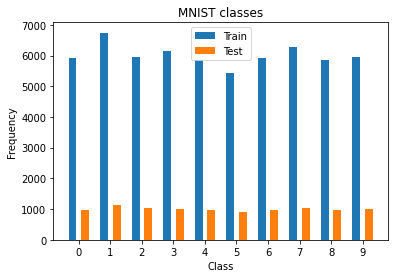

In [ ]:
labels = ["%s"%i for i in range(10)]

unique, counts = np.unique(y_train_ori, return_counts=True)
uniquet, countst = np.unique(y_test_ori, return_counts=True)

fig, ax = plt.subplots()
rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
rects2 = ax.bar(unique + 0.2, countst, 0.25, label='Test')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(labels)

plt.title('MNIST classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

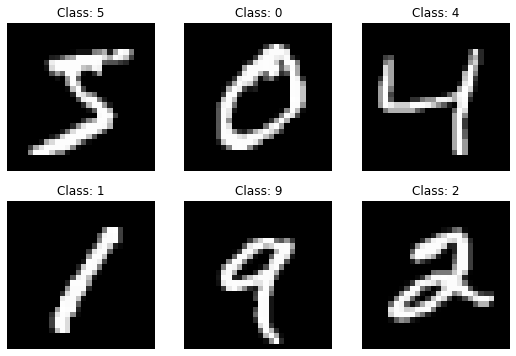

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train_ori[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [ ]:
# Reduce the image size to its half 
X_train = np.array([image[::2, 1::2] for image in X_train_ori])
X_test  = np.array([image[::2, 1::2] for image in X_test_ori])

y_train = y_train_ori
y_test = y_test_ori

y_train_padrao = y_train

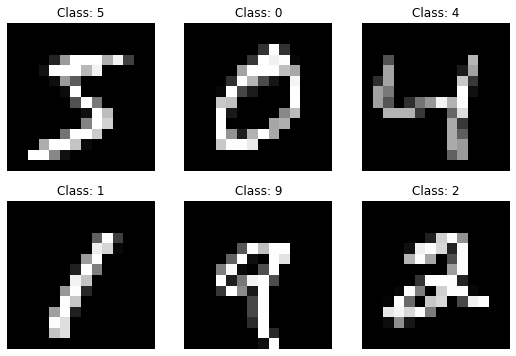

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [ ]:
X_train = (X_train/255.0).astype('float32').reshape((60000,14*14))
X_test = (X_test/255.0).astype('float32').reshape((10000,14*14))

print(X_train.dtype)
print(X_test.dtype)

print("\nShape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

print("\nMinimum value in X_train:", np.amin(X_train))
print("Maximum value in X_train:", np.amax(X_train))

print("\nMinimum value in X_test:", np.amin(X_test))
print("Maximum value in X_test:", np.amax(X_test))


float32
float32

Shape of X_train:  (60000, 196)
Shape of X_test:  (10000, 196)

Minimum value in X_train: 0.0
Maximum value in X_train: 1.0

Minimum value in X_test: 0.0
Maximum value in X_test: 1.0


In [ ]:
fraction = 30/100
D_train, D_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=fraction, random_state=512)

print(D_train.shape)
print(D_val.shape)
print(y_train.shape)
print(y_val.shape)

(42000, 196)
(18000, 196)
(42000,)
(18000,)


# 2. Training, evaluating and selecting models

In [ ]:
def model_selection_val(y, y_predict):
  print("erro quadratico medio: \n", metrics.mean_squared_error(y, y_predict))
  print("\nclassification report: \n",metrics.classification_report(y, y_predict))
  print("matrix confusion: \n",metrics.confusion_matrix(y, y_predict))



# Logistic Regression

In [ ]:
## Treina 
clf = linear_model.LogisticRegression(random_state=0, max_iter=2000).fit(D_train, y_train)
y_predict = clf.predict(D_train)


In [ ]:
clf.score(D_train, y_train)

model_selection_val(y_train, y_predict)

erro quadratico medio: 
 1.4487857142857143
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      4142
           1       0.94      0.97      0.95      4685
           2       0.92      0.89      0.90      4141
           3       0.90      0.88      0.89      4325
           4       0.91      0.92      0.92      4087
           5       0.88      0.87      0.88      3848
           6       0.94      0.95      0.95      4194
           7       0.93      0.93      0.93      4398
           8       0.89      0.87      0.88      4076
           9       0.88      0.90      0.89      4104

    accuracy                           0.92     42000
   macro avg       0.92      0.91      0.91     42000
weighted avg       0.92      0.92      0.92     42000

matrix confusion: 
 [[4003    1   14    8    9   35   30   10   29    3]
 [   1 4543   24   14    4   19    2   15   55    8]
 [  21   50 3689   63   53   23   56   64  110

# Neural Network

In [ ]:
nn = MLPClassifier(random_state=0, max_iter=500, learning_rate_init=0.01, hidden_layer_sizes=(10, )).fit(D_train, y_train)

y_predict_nn = nn.predict(D_train)

In [ ]:
nn.score(D_train, y_train)

model_selection_val(y_train, y_predict_nn)

erro quadratico medio: 
 1.2007380952380953
classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4142
           1       0.96      0.97      0.96      4685
           2       0.95      0.92      0.94      4141
           3       0.89      0.93      0.91      4325
           4       0.92      0.93      0.93      4087
           5       0.89      0.91      0.90      3848
           6       0.98      0.95      0.96      4194
           7       0.95      0.94      0.95      4398
           8       0.92      0.88      0.90      4076
           9       0.90      0.91      0.91      4104

    accuracy                           0.93     42000
   macro avg       0.93      0.93      0.93     42000
weighted avg       0.93      0.93      0.93     42000

matrix confusion: 
 [[4003    1    7   12   12   41   16    9   22   19]
 [   0 4540   19   14    5   16    4   18   58   11]
 [  14   34 3812   96   31   24    9   37   80

# SVM

In [ ]:
svm_clf = svm.LinearSVC(random_state=0, max_iter=5000).fit(D_train, y_train)

y_predict_svm = svm_clf.predict(D_train)

In [ ]:
svm_clf.score(D_train, y_train)

model_selection_val(y_train, y_predict_svm)

erro quadratico medio: 
 1.6512619047619048
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4142
           1       0.93      0.97      0.95      4685
           2       0.91      0.88      0.89      4141
           3       0.89      0.88      0.89      4325
           4       0.90      0.91      0.90      4087
           5       0.87      0.85      0.86      3848
           6       0.93      0.95      0.94      4194
           7       0.92      0.92      0.92      4398
           8       0.87      0.84      0.86      4076
           9       0.87      0.86      0.87      4104

    accuracy                           0.91     42000
   macro avg       0.90      0.90      0.90     42000
weighted avg       0.90      0.91      0.90     42000

matrix confusion: 
 [[4032    1    8    9    5   24   28    7   21    7]
 [   1 4551   27    9    4   23    5   12   46    7]
 [  28   55 3639   59   59   24   69   73  119

# 3 Choosing a final model

In [ ]:
y_predict_val = clf.predict(D_val)
print('clf\n', clf.score(D_val, y_val))

model_selection_val(y_val, y_predict_val)

clf
 0.9086666666666666
erro quadratico medio: 
 1.5659444444444444
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1781
           1       0.94      0.98      0.96      2057
           2       0.92      0.89      0.91      1817
           3       0.89      0.86      0.88      1806
           4       0.90      0.91      0.90      1755
           5       0.86      0.86      0.86      1573
           6       0.94      0.95      0.94      1724
           7       0.93      0.93      0.93      1867
           8       0.88      0.85      0.86      1775
           9       0.88      0.88      0.88      1845

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

matrix confusion: 
 [[1713    0   11    6    3   14   14    3   15    2]
 [   0 2009    8    9    2   11    0    0   18    0]
 [  15   17 1624   30 

In [ ]:
y_predict_nn_val = nn.predict(D_val)
print('nn\n', nn.score(D_val, y_val))

model_selection_val(y_val, y_predict_nn_val)

nn
 0.9203333333333333
erro quadratico medio: 
 1.3540555555555556
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1781
           1       0.96      0.97      0.96      2057
           2       0.94      0.91      0.93      1817
           3       0.86      0.90      0.88      1806
           4       0.91      0.92      0.92      1755
           5       0.86      0.90      0.88      1573
           6       0.96      0.94      0.95      1724
           7       0.94      0.94      0.94      1867
           8       0.90      0.85      0.88      1775
           9       0.89      0.90      0.90      1845

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000

matrix confusion: 
 [[1701    0    9   10    3   28   10    1   13    6]
 [   0 1996    9    5    1   10    1    5   27    3]
 [   5   16 1659   51  

In [ ]:
y_predict_svm_val = svm_clf.predict(D_val)
print('svm\n', svm_clf.score(D_val, y_val))

model_selection_val(y_val, y_predict_svm_val)

svm
 0.9004444444444445
erro quadratico medio: 
 1.7382222222222221
classification report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      1781
           1       0.93      0.97      0.95      2057
           2       0.91      0.88      0.89      1817
           3       0.88      0.86      0.87      1806
           4       0.90      0.90      0.90      1755
           5       0.85      0.85      0.85      1573
           6       0.94      0.95      0.94      1724
           7       0.91      0.92      0.92      1867
           8       0.87      0.82      0.85      1775
           9       0.87      0.86      0.86      1845

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000

matrix confusion: 
 [[1728    0    7   10    3    7   14    2   10    0]
 [   1 2005   12    4    2   11    1    0   19    2]
 [  17   22 1597   30 

# 4 Error estimation

In [ ]:
y_predict_nn_test = nn.predict(X_test)
print('nn\n', nn.score(X_test, y_test))

model_selection_val(y_test, y_predict_nn_test)

nn
 0.9255
erro quadratico medio: 
 1.2629
classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.96      0.97      0.96      1135
           2       0.94      0.91      0.92      1032
           3       0.88      0.92      0.90      1010
           4       0.92      0.94      0.93       982
           5       0.88      0.91      0.89       892
           6       0.96      0.93      0.94       958
           7       0.94      0.91      0.93      1028
           8       0.90      0.87      0.89       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

matrix confusion: 
 [[ 955    0    4    2    2    7    5    2    1    2]
 [   0 1100    3    2    1    0    3    5   21    0]
 [   5    4  937   20   10   14    7   13   22 

In [ ]:
sklearn.model_selection.cross_val_square(nn, )

In [ ]:
## X_train == D_train U D_val
nn2 = MLPClassifier(random_state=0, max_iter=500, learning_rate_init=0.01, hidden_layer_sizes=(10, )).fit(X_train, y_train_padrao)

y_predict_nn = nn.predict(X_train)

In [ ]:
print('nn treino\n', nn.score(X_train, y_train))

model_selection_val(y_train, y_predict_nn)

nn treino
 0.9289
erro quadratico medio: 
 1.2467333333333332
classification report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      5923
           1       0.96      0.97      0.96      6742
           2       0.95      0.92      0.93      5958
           3       0.88      0.92      0.90      6131
           4       0.92      0.93      0.92      5842
           5       0.89      0.91      0.90      5421
           6       0.97      0.95      0.96      5918
           7       0.95      0.94      0.94      6265
           8       0.91      0.87      0.89      5851
           9       0.89      0.91      0.90      5949

    accuracy                           0.93     60000
   macro avg       0.93      0.93      0.93     60000
weighted avg       0.93      0.93      0.93     60000

matrix confusion: 
 [[5704    1   16   22   15   69   26   10   35   25]
 [   0 6536   28   19    6   26    5   23   85   14]
 [  19   50 5471  147   47  

In [ ]:
y_predict_nn_test = nn.predict(X_test)
print('nn\n', nn.score(X_test, y_test))

model_selection_val(y_test, y_predict_nn_test)

nn
 0.9255
erro quadratico medio: 
 1.2629
classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.96      0.97      0.96      1135
           2       0.94      0.91      0.92      1032
           3       0.88      0.92      0.90      1010
           4       0.92      0.94      0.93       982
           5       0.88      0.91      0.89       892
           6       0.96      0.93      0.94       958
           7       0.94      0.91      0.93      1028
           8       0.90      0.87      0.89       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

matrix confusion: 
 [[ 955    0    4    2    2    7    5    2    1    2]
 [   0 1100    3    2    1    0    3    5   21    0]
 [   5    4  937   20   10   14    7   13   22 